In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_excel('training.xlsx')

# Separate the dataset into two classes
class_1_data = data[data['output'] == 0].iloc[:, :-1]
class_2_data = data[data['output'] == 1].iloc[:, :-1]

# Calculate the mean (centroid) for each class
centroid_class_1 = class_1_data.mean(axis=0)
centroid_class_2 = class_2_data.mean(axis=0)

# Calculate the spread (standard deviation) for each class
spread_class_1 = class_1_data.std(axis=0)
spread_class_2 = class_2_data.std(axis=0)

# Calculate the distance between the mean vectors of the two classes
interclass_distance = np.linalg.norm(centroid_class_1 - centroid_class_2)

# Output the results
print("Class 1 Centroid:")
print(centroid_class_1)
print("\nClass 1 Spread:")
print(spread_class_1)
print("\nClass 2 Centroid:")
print(centroid_class_2)
print("\nClass 2 Spread:")
print(spread_class_2)
print("\nInterclass Distance:", interclass_distance)


Class 1 Centroid:
embed_0     -0.153674
embed_1      0.211456
embed_2      0.155295
embed_3      0.093863
embed_4     -0.488665
               ...   
embed_379   -0.165440
embed_380   -0.152975
embed_381   -0.008719
embed_382    0.276078
embed_383   -0.030131
Length: 384, dtype: float64

Class 1 Spread:
embed_0      0.294157
embed_1      0.089135
embed_2      0.119411
embed_3      0.116298
embed_4      0.148771
               ...   
embed_379    0.179513
embed_380    0.249280
embed_381    0.095489
embed_382    0.233278
embed_383    0.161591
Length: 384, dtype: float64

Class 2 Centroid:
embed_0     -0.184075
embed_1      0.137983
embed_2      0.104661
embed_3      0.127538
embed_4     -0.408991
               ...   
embed_379   -0.153687
embed_380   -0.141090
embed_381    0.004908
embed_382    0.271903
embed_383   -0.027964
Length: 384, dtype: float64

Class 2 Spread:
embed_0      0.205344
embed_1      0.169176
embed_2      0.190184
embed_3      0.165142
embed_4      0.180539
         

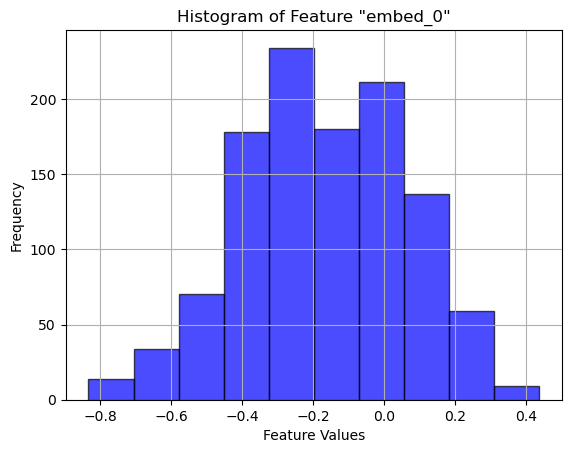

Mean: -0.17029445322602035
Variance: 0.05343827792925803


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('training.xlsx')

# Extract the feature data (assuming you want to analyze 'embed_0' feature)
feature_data = data['embed_0']

# Calculate histogram using numpy
hist, bins = np.histogram(feature_data, bins=10)  # You can adjust the number of bins as needed

# Plot the histogram
plt.hist(feature_data, bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Feature "embed_0"')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate mean and variance
mean = np.mean(feature_data)
variance = np.var(feature_data)

print("Mean:", mean)
print("Variance:", variance)


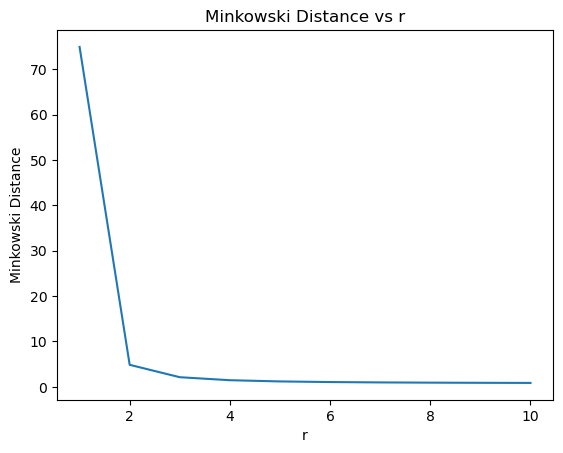

In [4]:
from scipy.spatial.distance import minkowski

feature_vector1 = data.iloc[0, :]  # Example feature vector 1
feature_vector2 = data.iloc[1, :]  # Example feature vector 2

r_values = range(1, 11)
distances = []

for r in r_values:
    distance = minkowski(feature_vector1, feature_vector2, r)
    distances.append(distance)

plt.plot(r_values, distances)
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs r')
plt.show()


In [6]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['output'])  # Features
y = data['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Assuming you have already loaded your dataset into X and y
# X should contain the feature vectors and y should contain the target variable

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Define the kNN classifier
neigh = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
neigh.fit(X_train, y_train)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.